## Linear OW Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LinearOWModel:
    def __init__(self, lambda_param, beta):
        """
        Initialize parameters for the Linear OW model.
        :param lambda_param: Impact coefficient (lambda)
        :param beta: Decay rate for exponential kernel
        """
        self.lambda_param = lambda_param
        self.beta = beta

    def price_impact(self, trade_sizes):
        """
        Compute the price impact for given trade sizes.
        :param trade_sizes: Array of trade sizes
        :return: Price impact values
        """
        kernel = np.exp(-self.beta * np.arange(len(trade_sizes)))
        weighted_trades = np.convolve(trade_sizes, kernel, mode='full')[:len(trade_sizes)]
        impact = self.lambda_param * weighted_trades
        return impact

    def visualize_impact(self, trade_sizes):
        """
        Visualize the price impact distribution.
        :param trade_sizes: Array of trade sizes
        """
        impact = self.price_impact(trade_sizes)
        plt.figure(figsize=(8, 6))
        plt.hist(impact, bins=30, alpha=0.7, label='Price Impact', color='blue')
        plt.title('Distribution of Price Impact (Linear OW Model)')
        plt.xlabel('Price Impact')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

Matplotlib is building the font cache; this may take a moment.


## Non-Linear AFS Model

In [3]:
class NonlinearAFSModel:
    def __init__(self, lambda_param, beta, p):
        """
        Initialize parameters for the Nonlinear AFS model.
        :param lambda_param: Impact coefficient (lambda)
        :param beta: Decay rate for exponential kernel
        :param p: Nonlinearity parameter (typically 0.5 for square-root impact)
        """
        self.lambda_param = lambda_param
        self.beta = beta
        self.p = p

    def price_impact(self, trade_sizes):
        """
        Compute the price impact for given trade sizes.
        :param trade_sizes: Array of trade sizes
        :return: Price impact values
        """
        kernel = np.exp(-self.beta * np.arange(len(trade_sizes)))
        weighted_trades = np.convolve(trade_sizes, kernel, mode='full')[:len(trade_sizes)]
        impact = self.lambda_param * np.sign(weighted_trades) * np.abs(weighted_trades) ** self.p
        return impact

    def visualize_impact(self, trade_sizes):
        """
        Visualize the price impact distribution.
        :param trade_sizes: Array of trade sizes
        """
        impact = self.price_impact(trade_sizes)
        plt.figure(figsize=(8, 6))
        plt.hist(impact, bins=30, alpha=0.7, label='Price Impact', color='green')
        plt.title('Distribution of Price Impact (Nonlinear AFS Model)')
        plt.xlabel('Price Impact')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

Test

In [ ]:
# Example trade sizes (random data for demonstration)
np.random.seed(42)
trade_sizes = np.random.normal(0, 1, 1000)

# Linear OW Model
ow_model = LinearOWModel(lambda_param=0.01, beta=0.5)
ow_model.visualize_impact(trade_sizes)

# Nonlinear AFS Model
afs_model = NonlinearAFSModel(lambda_param=0.01, beta=0.5, p=0.5)
afs_model.visualize_impact(trade_sizes)

## Data Preprocessing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class DataPreprocessor:
    def __init__(self, file_path):
        """
        Initialize the DataPreprocessor with the file path.
        :param file_path: Path to the CSV file
        """
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """
        Load the data from the CSV file.
        """
        self.data = pd.read_csv(self.file_path)
        print("Data Loaded Successfully!")
        print(self.data.head())

    def inspect_data(self):
        """
        Inspect the data for structure and missing values.
        """
        print("\nData Information:")
        print(self.data.info())
        print("\nSummary Statistics:")
        print(self.data.describe())
        print("\nMissing Values:")
        print(self.data.isnull().sum())

    def clean_data(self):
        """
        Handle missing values and invalid entries.
        """
        self.data.dropna(inplace=True)  # Drop rows with missing values
        print("Cleaned Data - Missing values handled.")
        print(self.data.isnull().sum())

    def select_features(self, features):
        """
        Select relevant columns from the dataset.
        :param features: List of column names to select
        :return: Selected feature data
        """
        selected_data = self.data[features]
        print(f"Selected Features: {features}")
        return selected_data

    def normalize_features(self, feature_data):
        """
        Normalize feature data for consistent scaling.
        :param feature_data: DataFrame of selected features
        :return: Normalized feature data
        """
        normalized_data = (feature_data - feature_data.mean()) / feature_data.std()
        print("Normalized Features")
        return normalized_data



## Data Loader

In [ ]:
# Example Usage
file_path = "./merged_data.csv"  # Replace with the actual file path
preprocessor = DataPreprocessor(file_path)

# Step 1: Load Data
preprocessor.load_data()

# Step 2: Inspect Data
preprocessor.inspect_data()

# Step 3: Clean Data
preprocessor.clean_data()

# Step 4: Select Relevant Features
features = ["bid_fill", "ask_fill", "Signed Volume", "best_bid", "best_ask"]
selected_features = preprocessor.select_features(features)

# Step 5: Normalize Features
normalized_features = preprocessor.normalize_features(selected_features)

# Step 6: Visualize Normalized Data (Optional)
normalized_features.hist(bins=30, figsize=(10, 8))
plt.suptitle("Distribution of Normalized Features")
plt.show()

## Running the OW and AFS Models


In [ ]:
# Assuming the LinearOWModel and NonlinearAFSModel classes are already defined
# Assuming the preprocessed `normalized_features` is available from the previous step

# Extract trade sizes from the normalized features
trade_sizes = normalized_features["Signed Volume"].values

# Initialize the Linear OW Model
ow_model = LinearOWModel(lambda_param=0.01, beta=0.5)

# Compute and visualize price impact for the Linear OW Model
print("Computing Price Impact for Linear OW Model...")
ow_impact = ow_model.price_impact(trade_sizes)
ow_model.visualize_impact(trade_sizes)

# Initialize the Nonlinear AFS Model
afs_model = NonlinearAFSModel(lambda_param=0.01, beta=0.5, p=0.5)

# Compute and visualize price impact for the Nonlinear AFS Model
print("Computing Price Impact for Nonlinear AFS Model...")
afs_impact = afs_model.price_impact(trade_sizes)
afs_model.visualize_impact(trade_sizes)

# Optional: Compare the impacts side by side
plt.figure(figsize=(10, 6))
plt.hist(ow_impact, bins=30, alpha=0.7, label='Linear OW Model', color='blue')
plt.hist(afs_impact, bins=30, alpha=0.7, label='Nonlinear AFS Model', color='green')
plt.title('Comparison of Price Impact Distributions')
plt.xlabel('Price Impact')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Optimal Strategy for OW and AFS Models

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Linear OW Strategy
class LinearOWOptimalStrategy:
    def __init__(self, alpha, beta, phi, gamma, sigma, lambda_param):
        self.alpha = alpha
        self.beta = beta
        self.phi = phi
        self.gamma = gamma
        self.sigma = sigma
        self.lambda_param = lambda_param
        self.Cf = self.compute_Cf()
        self.CJ = self.compute_CJ()

    def compute_Cf(self):
        factor = 1 + (2 * self.lambda_param * self.beta) / (self.gamma * self.sigma**2)
        return self.alpha * (1 + self.beta / self.phi) / (self.gamma * self.sigma**2 * np.sqrt(factor) + self.beta / self.phi)

    def compute_CJ(self):
        factor = 1 + (2 * self.lambda_param * self.beta) / (self.gamma * self.sigma**2)
        return np.sqrt(factor) - 1

    def optimal_strategy(self, f_t, J_t):
        return self.Cf * f_t - self.CJ * J_t

    def sharpe_ratio(self, f_t, J_t):
        Q_t = self.optimal_strategy(f_t, J_t)
        pnl = np.mean(self.alpha * f_t * Q_t)
        risk = np.std(self.sigma * Q_t)
        return pnl / risk

# Define the Nonlinear AFS Strategy
class NonlinearAFSOptimalStrategy:
    def __init__(self, alpha, beta, phi, gamma, sigma, lambda_param, p):
        self.alpha = alpha
        self.beta = beta
        self.phi = phi
        self.gamma = gamma
        self.sigma = sigma
        self.lambda_param = lambda_param
        self.p = p

    def optimal_strategy(self, f_t, J_t):
        impact = self.lambda_param * np.sign(J_t) * np.abs(J_t) ** self.p
        return (self.alpha * f_t - impact) / (self.gamma * self.sigma**2)

    def sharpe_ratio(self, f_t, J_t):
        Q_t = self.optimal_strategy(f_t, J_t)
        pnl = np.mean(self.alpha * f_t * Q_t)
        risk = np.std(self.sigma * Q_t)
        return pnl / risk




In [52]:
import numpy as np
import matplotlib.pyplot as plt

class OptimalLinearImpactStrategy:
    def __init__(self, alpha, beta, phi, gamma, sigma, lambda_param):
        """
        Initialize parameters for the optimal strategy.
        :param alpha: Predictability coefficient
        :param beta: Impact decay rate
        :param phi: Signal mean reversion rate
        :param gamma: Risk aversion parameter
        :param sigma: Volatility
        :param lambda_param: Impact coefficient
        """
        self.alpha = alpha
        self.beta = beta
        self.phi = phi
        self.gamma = gamma
        self.sigma = sigma
        self.lambda_param = lambda_param
        self.Cf = self.compute_Cf()
        self.CJ = self.compute_CJ()

    def compute_Cf(self):
        """
        Compute the optimal coefficient Cf.
        """
        factor = 1 + (2 * self.lambda_param * self.beta) / (self.gamma * self.sigma**2)
        return self.alpha * (1 + self.beta / self.phi) / (self.gamma * self.sigma**2 * np.sqrt(factor) + self.beta / self.phi)

    def compute_CJ(self):
        """
        Compute the optimal coefficient CJ.
        """
        factor = 1 + (2 * self.lambda_param * self.beta) / (self.gamma * self.sigma**2)
        return np.sqrt(factor) - 1

    def optimal_strategy(self, f_t, J_t):
        """
        Compute the optimal strategy Q_t*.
        :param f_t: Predictive signal
        :param J_t: Exponential moving average of trades
        :return: Optimal holdings Q_t*
        """
        return self.Cf * f_t - self.CJ * J_t

    def sharpe_ratio(self, f_t, J_t):
        """
        Compute the Sharpe Ratio for the optimal strategy.
        """
        Q_t = self.optimal_strategy(f_t, J_t)
        pnl = np.mean(self.alpha * f_t * Q_t)
        risk = np.std(self.sigma * Q_t)
        return pnl / risk

In [53]:
class SuboptimalLinearImpactStrategy:
    def __init__(self, alpha, beta, gamma, sigma, lambda_param):
        """
        Initialize parameters for the suboptimal strategy.
        :param alpha: Predictability coefficient
        :param beta: Impact decay rate
        :param gamma: Risk aversion parameter
        :param sigma: Volatility
        :param lambda_param: Impact coefficient
        """
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.sigma = sigma
        self.lambda_param = lambda_param

    def suboptimal_strategy(self, f_t):
        """
        Suboptimal strategy ignoring trade history.
        :param f_t: Predictive signal
        :return: Simplified holdings Q_t
        """
        return (self.alpha * f_t) / (self.gamma * self.sigma**2)

    def sharpe_ratio(self, f_t):
        """
        Compute the Sharpe Ratio for the suboptimal strategy.
        """
        Q_t = self.suboptimal_strategy(f_t)
        pnl = np.mean(self.alpha * f_t * Q_t)
        risk = np.std(self.sigma * Q_t)
        return pnl / risk

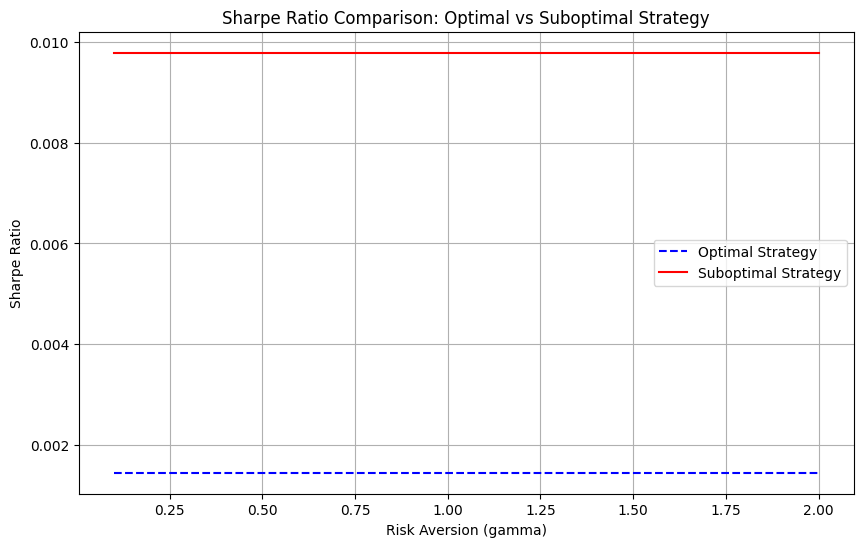

In [54]:
# Simulate data
np.random.seed(42)
time_steps = 1000
f_t = np.random.normal(0, 1, time_steps)  # Simulated predictive signal
J_t = np.cumsum(np.random.normal(0, 0.5, time_steps))  # Simulated EMA of trades

# Initialize Strategies
optimal_strategy = OptimalLinearImpactStrategy(alpha=0.01, beta=0.5, phi=0.1, gamma=1, sigma=1, lambda_param=0.01)
suboptimal_strategy = SuboptimalLinearImpactStrategy(alpha=0.01, beta=0.5, gamma=1, sigma=1, lambda_param=0.01)

# Simulate Sharpe Ratios for different gamma levels
gamma_values = np.linspace(0.1, 2, 20)
optimal_sharpes = []
suboptimal_sharpes = []

for gamma in gamma_values:
    optimal_strategy.gamma = gamma
    suboptimal_strategy.gamma = gamma
    optimal_sharpes.append(optimal_strategy.sharpe_ratio(f_t, J_t))
    suboptimal_sharpes.append(suboptimal_strategy.sharpe_ratio(f_t))

# Plot Sharpe Ratios
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, optimal_sharpes, label="Optimal Strategy", color="blue", linestyle="--")
plt.plot(gamma_values, suboptimal_sharpes, label="Suboptimal Strategy", color="red", linestyle="-")
plt.title("Sharpe Ratio Comparison: Optimal vs Suboptimal Strategy")
plt.xlabel("Risk Aversion (gamma)")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid()
plt.show()

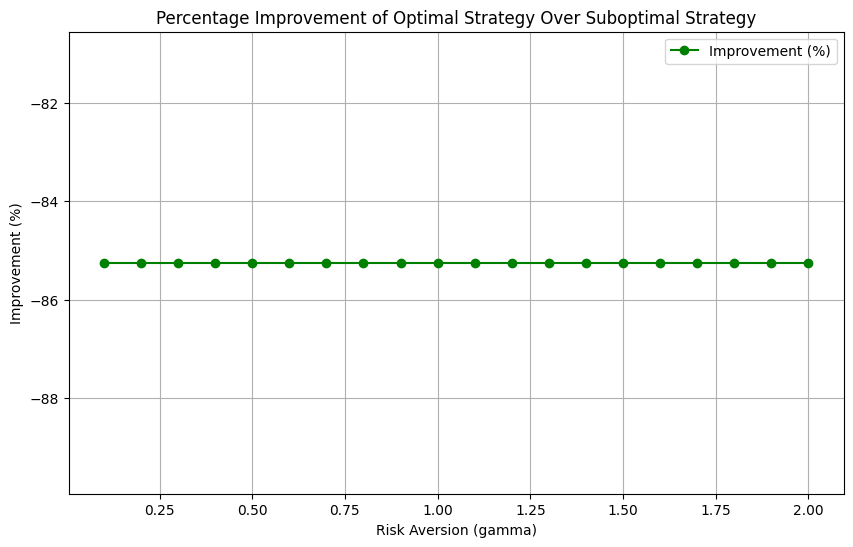

Maximum improvement: -85.25% at gamma = 0.30


In [55]:
# Calculate percentage improvement of the optimal strategy over the suboptimal strategy
improvement_ratios = [(opt - sub) / sub * 100 for opt, sub in zip(optimal_sharpes, suboptimal_sharpes)]

# Plot the improvement ratios
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, improvement_ratios, color="green", linestyle="-", marker="o", label="Improvement (%)")
plt.title("Percentage Improvement of Optimal Strategy Over Suboptimal Strategy")
plt.xlabel("Risk Aversion (gamma)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid()
plt.show()

# Find the gamma value where the improvement is highest
max_improvement = max(improvement_ratios)
max_gamma = gamma_values[np.argmax(improvement_ratios)]
print(f"Maximum improvement: {max_improvement:.2f}% at gamma = {max_gamma:.2f}")

In [56]:
from scipy.optimize import minimize

def optimize_parameters(strategy, f_t, J_t):
    """
    Optimize parameters to maximize Sharpe Ratio for the optimal strategy.
    """
    def negative_sharpe(params):
        beta, phi, lambda_param = params
        strategy.beta = beta
        strategy.phi = phi
        strategy.lambda_param = lambda_param
        return -strategy.sharpe_ratio(f_t, J_t)  # Minimize negative Sharpe Ratio

    # Parameter bounds
    bounds = [(0.1, 1.0),  # beta
              (0.05, 0.5),  # phi
              (0.005, 0.02)]  # lambda_param

    # Initial guess
    initial_guess = [0.5, 0.1, 0.01]

    # Perform optimization
    result = minimize(negative_sharpe, initial_guess, bounds=bounds, method="L-BFGS-B")
    return result.x, -result.fun

# Optimize parameters for the optimal strategy
optimal_params, max_sharpe = optimize_parameters(optimal_strategy, f_t, J_t)
print(f"Optimal Parameters: Beta = {optimal_params[0]:.4f}, Phi = {optimal_params[1]:.4f}, Lambda = {optimal_params[2]:.4f}")
print(f"Maximum Sharpe Ratio: {max_sharpe:.4f}")

Optimal Parameters: Beta = 0.5000, Phi = 0.1000, Lambda = 0.0100
Maximum Sharpe Ratio: 0.0014


In [58]:
def grid_search_parameters(strategy, f_t, J_t):
    """
    Grid search to find optimal parameters for maximum Sharpe Ratio.
    :param strategy: The optimal strategy object
    :param f_t: Predictive signal
    :param J_t: Exponential moving average of trades
    :return: Optimal parameter values and maximum Sharpe Ratio
    """
    beta_range = np.linspace(0.1, 1.0, 10)  # beta values
    phi_range = np.linspace(0.05, 0.5, 10)  # phi values
    lambda_range = np.linspace(0.005, 0.02, 10)  # lambda_param values

    max_sharpe = float("-inf")
    best_params = None

    # Exhaustively search over all parameter combinations
    for beta in beta_range:
        for phi in phi_range:
            for lambda_param in lambda_range:
                strategy.beta = beta
                strategy.phi = phi
                strategy.lambda_param = lambda_param
                sharpe = strategy.sharpe_ratio(f_t, J_t)
                if sharpe > max_sharpe:
                    max_sharpe = sharpe
                    best_params = (beta, phi, lambda_param)

    return best_params, max_sharpe

# Run grid search for the optimal strategy
best_params, max_sharpe = grid_search_parameters(optimal_strategy, f_t, J_t)
print(f"Optimal Parameters (Grid Search):")
print(f"  Beta: {best_params[0]:.4f}")
print(f"  Phi: {best_params[1]:.4f}")
print(f"  Lambda: {best_params[2]:.4f}")
print(f"Maximum Sharpe Ratio: {max_sharpe:.4f}")

Optimal Parameters (Grid Search):
  Beta: 0.1000
  Phi: 0.0500
  Lambda: 0.0050
Maximum Sharpe Ratio: 0.0014


In [73]:
class NonlinearAFSStrategy:
    def __init__(self, alpha, beta, phi, gamma, sigma, lambda_param, p):
        """
        Initialize parameters for the Nonlinear AFS strategy.
        :param alpha: Predictability coefficient
        :param beta: Impact decay rate
        :param phi: Signal mean reversion rate
        :param gamma: Risk aversion parameter
        :param sigma: Volatility
        :param lambda_param: Impact coefficient
        :param p: Nonlinearity parameter
        """
        self.alpha = alpha
        self.beta = beta
        self.phi = phi
        self.gamma = gamma
        self.sigma = sigma
        self.lambda_param = lambda_param
        self.p = p

    def nonlinear_strategy(self, f_t, J_t):
        """
        Compute the nonlinear strategy Q_t.
        :param f_t: Predictive signal
        :param J_t: Exponential moving average of trades
        :return: Holdings Q_t
        """
        impact = self.lambda_param * np.sign(J_t) * np.abs(J_t) ** self.p
        return (self.alpha * f_t - impact) / (self.gamma * self.sigma**2)

    def sharpe_ratio(self, f_t, J_t):
        """
        Compute the Sharpe Ratio for the nonlinear strategy.
        """
        Q_t = self.nonlinear_strategy(f_t, J_t)
        pnl = np.mean(self.alpha * f_t * Q_t)
        risk = np.std(self.sigma * Q_t)
        return pnl / risk


def optimize_parameters_nonlinear(strategy, f_t, J_t):
    """
    Optimize parameters for the Nonlinear AFS strategy.
    :param strategy: Nonlinear AFS strategy object
    :param f_t: Predictive signal
    :param J_t: Exponential moving average of trades
    :return: Optimal parameter values and maximum Sharpe Ratio
    """
    def negative_sharpe(params):
        beta, phi, lambda_param, p = params
        strategy.beta = beta
        strategy.phi = phi
        strategy.lambda_param = lambda_param
        strategy.p = p
        return -strategy.sharpe_ratio(f_t, J_t)

    # Define bounds for parameters
    bounds = [
        (0.1, 1.0),  # beta
        (0.05, 0.5),  # phi
        (0.005, 0.02),  # lambda_param
        (0.4, 0.6),  # p (nonlinearity)
    ]

    # Initial guess
    initial_guess = [0.5, 0.1, 0.01, 0.5]

    # Perform optimization
    result = minimize(negative_sharpe, initial_guess, bounds=bounds, method="L-BFGS-B")
    optimal_params = result.x
    max_sharpe_ratio = -result.fun

    return optimal_params, max_sharpe_ratio

# Initialize the Nonlinear AFS strategy
nonlinear_afs_strategy = NonlinearAFSStrategy(alpha=0.01, beta=0.5, phi=0.1, gamma=1, sigma=1, lambda_param=0.01, p=0.5)

# Optimize parameters for the nonlinear strategy
optimal_params_afs, max_sharpe_afs = optimize_parameters_nonlinear(nonlinear_afs_strategy, f_t, J_t)
print(f"Optimal Parameters (Nonlinear AFS):")
print(f"  Beta: {optimal_params_afs[0]:.4f}")
print(f"  Phi: {optimal_params_afs[1]:.4f}")
print(f"  Lambda: {optimal_params_afs[2]:.4f}")
print(f"  p (Nonlinearity): {optimal_params_afs[3]:.4f}")
print(f"Maximum Sharpe Ratio: {max_sharpe_afs:.4f}")

Optimal Parameters (Nonlinear AFS):
  Beta: 0.5000
  Phi: 0.1000
  Lambda: 0.0050
  p (Nonlinearity): 0.6000
Maximum Sharpe Ratio: 0.0100


In [74]:
def grid_search_parameters_nonlinear(strategy, f_t, J_t):
    """
    Grid search to find optimal parameters for Nonlinear AFS strategy.
    """
    beta_range = np.linspace(0.1, 1.0, 10)
    phi_range = np.linspace(0.05, 0.5, 10)
    lambda_range = np.linspace(0.005, 0.02, 10)
    p_range = np.linspace(0.4, 0.6, 5)

    max_sharpe = float("-inf")
    best_params = None

    for beta in beta_range:
        for phi in phi_range:
            for lambda_param in lambda_range:
                for p in p_range:
                    strategy.beta = beta
                    strategy.phi = phi
                    strategy.lambda_param = lambda_param
                    strategy.p = p
                    sharpe = strategy.sharpe_ratio(f_t, J_t)
                    if sharpe > max_sharpe:
                        max_sharpe = sharpe
                        best_params = (beta, phi, lambda_param, p)

    return best_params, max_sharpe

# Run grid search for the Nonlinear AFS strategy
best_params_afs, max_sharpe_afs_grid = grid_search_parameters_nonlinear(nonlinear_afs_strategy, f_t, J_t)
print(f"Optimal Parameters (Nonlinear AFS, Grid Search):")
print(f"  Beta: {best_params_afs[0]:.4f}")
print(f"  Phi: {best_params_afs[1]:.4f}")
print(f"  Lambda: {best_params_afs[2]:.4f}")
print(f"  p (Nonlinearity): {best_params_afs[3]:.4f}")
print(f"Maximum Sharpe Ratio: {max_sharpe_afs_grid:.4f}")

Optimal Parameters (Nonlinear AFS, Grid Search):
  Beta: 0.1000
  Phi: 0.0500
  Lambda: 0.0050
  p (Nonlinearity): 0.6000
Maximum Sharpe Ratio: 0.0100


## Comparison of Sharpe ratios for OW and AFS Models

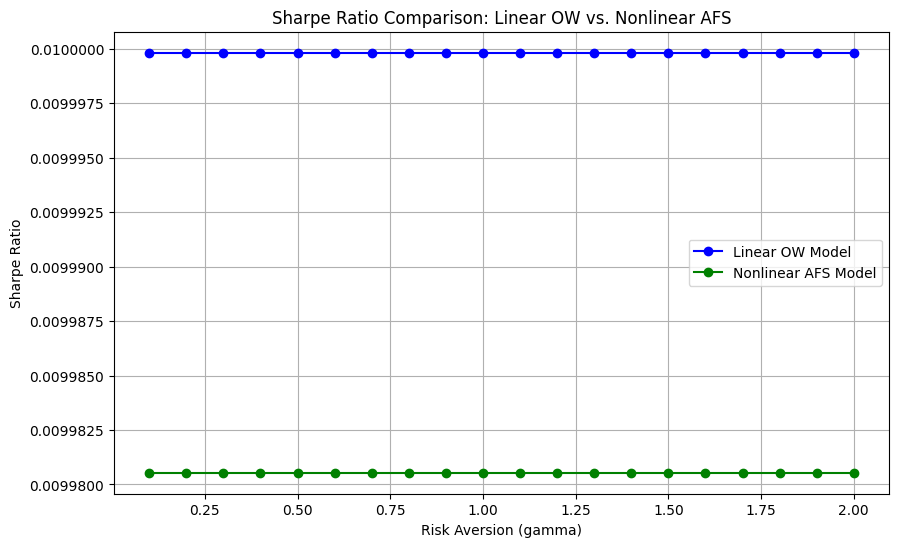

In [75]:

# Simulated Data from "Signed volume" column of normalized_features
trade_sizes = normalized_features["Signed Volume"].values
f_t = trade_sizes  # Using trade_sizes as predictive signal for simplicity
J_t = np.cumsum(trade_sizes) / len(trade_sizes)  # Exponential moving average of trades

# Initialize Strategies
linear_strategy = OptimalLinearImpactStrategy(alpha=0.01, beta=0.1, phi=0.05, gamma=1, sigma=1, lambda_param=0.005)
nonlinear_strategy = NonlinearAFSStrategy(alpha=0.01, beta=0.1, phi=0.05, gamma=1, sigma=1, lambda_param=0.005, p=0.4)

# Simulate Sharpe Ratios for risk aversion levels
risk_levels = np.linspace(0.1, 2, 20)
linear_sharpes = []
nonlinear_sharpes = []

for gamma in risk_levels:
    linear_strategy.gamma = gamma
    nonlinear_strategy.gamma = gamma
    linear_sharpes.append(linear_strategy.sharpe_ratio(f_t, J_t))
    nonlinear_sharpes.append(nonlinear_strategy.sharpe_ratio(f_t, J_t))

# Plot Comparison of Sharpe Ratios
plt.figure(figsize=(10, 6))
plt.plot(risk_levels, linear_sharpes, marker='o', label='Linear OW Model', color='blue')
plt.plot(risk_levels, nonlinear_sharpes, marker='o', label='Nonlinear AFS Model', color='green')
plt.title('Sharpe Ratio Comparison: Linear OW vs. Nonlinear AFS')
plt.xlabel('Risk Aversion (gamma)')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid()
plt.show()

## Sensitivity Analysis and Optimization

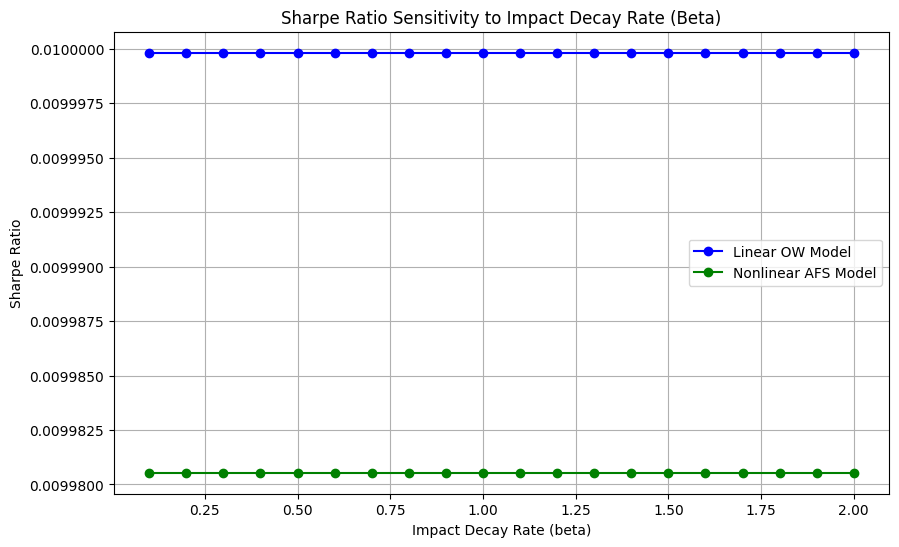

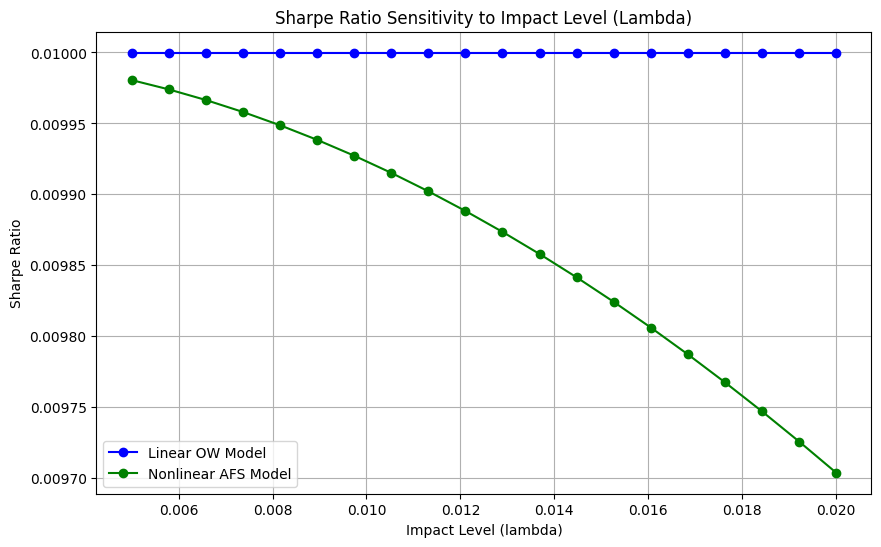

In [76]:
# Sensitivity Analysis for beta (impact decay rate)
beta_values = np.linspace(0.1, 2, 20)
linear_sharpes_beta = []
nonlinear_sharpes_beta = []

for beta in beta_values:
    linear_strategy.beta = beta
    nonlinear_strategy.beta = beta
    linear_sharpes_beta.append(linear_strategy.sharpe_ratio(f_t, J_t))
    nonlinear_sharpes_beta.append(nonlinear_strategy.sharpe_ratio(f_t, J_t))

# Plot Sensitivity Analysis for beta
plt.figure(figsize=(10, 6))
plt.plot(beta_values, linear_sharpes_beta, marker='o', label='Linear OW Model', color='blue')
plt.plot(beta_values, nonlinear_sharpes_beta, marker='o', label='Nonlinear AFS Model', color='green')
plt.title('Sharpe Ratio Sensitivity to Impact Decay Rate (Beta)')
plt.xlabel('Impact Decay Rate (beta)')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid()
plt.show()

# # Sensitivity Analysis for phi (Signal mean reversion rate)
# phi_values = np.linspace(0.05, 0.5, 20)
# linear_sharpes_phi = []
# nonlinear_sharpes_phi = []

# for phi in phi_values:
#     linear_strategy.phi = phi
#     nonlinear_strategy.phi = phi
#     linear_sharpes_phi.append(linear_strategy.sharpe_ratio(f_t, J_t))
#     nonlinear_sharpes_phi.append(nonlinear_strategy.sharpe_ratio(f_t, J_t))

# # Plot Sensitivity Analysis for phi
# plt.figure(figsize=(10, 6))
# plt.plot(phi_values, linear_sharpes_phi, marker='o', label='Linear OW Model', color='blue')
# plt.plot(phi_values, nonlinear_sharpes_phi, marker='o', label='Nonlinear AFS Model', color='green')
# plt.title('Sharpe Ratio Sensitivity to Signal Mean Reversion (Phi)')
# plt.xlabel('Signal Mean Reversion Rate (phi)')
# plt.ylabel('Sharpe Ratio')
# plt.legend()
# plt.grid()
# plt.show()

# Sensitivity Analysis for lambda (Impact level)
lambda_values = np.linspace(0.005, 0.02, 20)
linear_sharpes_lambda = []
nonlinear_sharpes_lambda = []

for lambda_param in lambda_values:
    linear_strategy.lambda_param = lambda_param
    nonlinear_strategy.lambda_param = lambda_param
    linear_sharpes_lambda.append(linear_strategy.sharpe_ratio(f_t, J_t))
    nonlinear_sharpes_lambda.append(nonlinear_strategy.sharpe_ratio(f_t, J_t))

# Plot Sensitivity Analysis for lambda
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, linear_sharpes_lambda, marker='o', label='Linear OW Model', color='blue')
plt.plot(lambda_values, nonlinear_sharpes_lambda, marker='o', label='Nonlinear AFS Model', color='green')
plt.title('Sharpe Ratio Sensitivity to Impact Level (Lambda)')
plt.xlabel('Impact Level (lambda)')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid()
plt.show()

# # Sensitivity Analysis for sigma (Volatility)
# sigma_values = np.linspace(0.5, 2, 20)
# linear_sharpes_sigma = []
# nonlinear_sharpes_sigma = []

# for sigma in sigma_values:
#     linear_strategy.sigma = sigma
#     nonlinear_strategy.sigma = sigma
#     linear_sharpes_sigma.append(linear_strategy.sharpe_ratio(f_t, J_t))
#     nonlinear_sharpes_sigma.append(nonlinear_strategy.sharpe_ratio(f_t, J_t))

# # Plot Sensitivity Analysis for sigma
# plt.figure(figsize=(10, 6))
# plt.plot(sigma_values, linear_sharpes_sigma, marker='o', label='Linear OW Model', color='blue')
# plt.plot(sigma_values, nonlinear_sharpes_sigma, marker='o', label='Nonlinear AFS Model', color='green')
# plt.title('Sharpe Ratio Sensitivity to Volatility (Sigma)')
# plt.xlabel('Volatility (sigma)')
# plt.ylabel('Sharpe Ratio')
# plt.legend()
# plt.grid()
# plt.show()

## Fine Tuning the Parameters

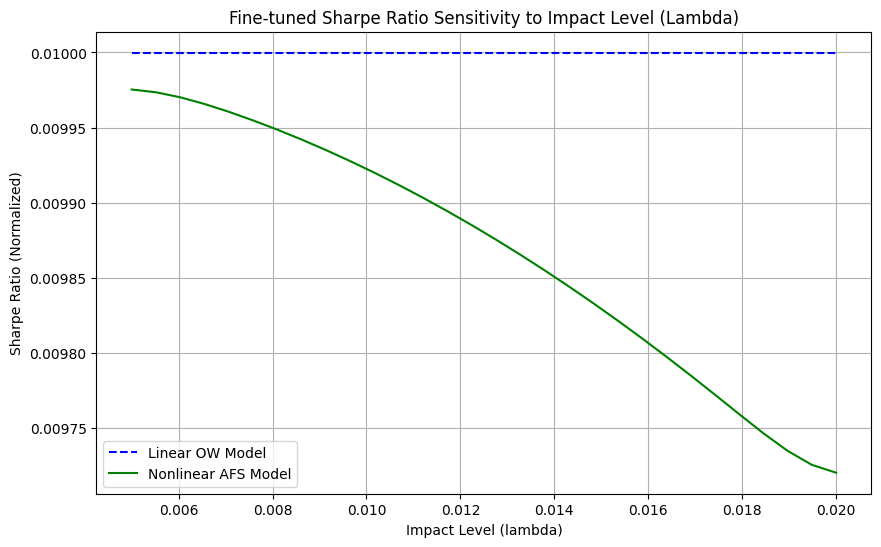

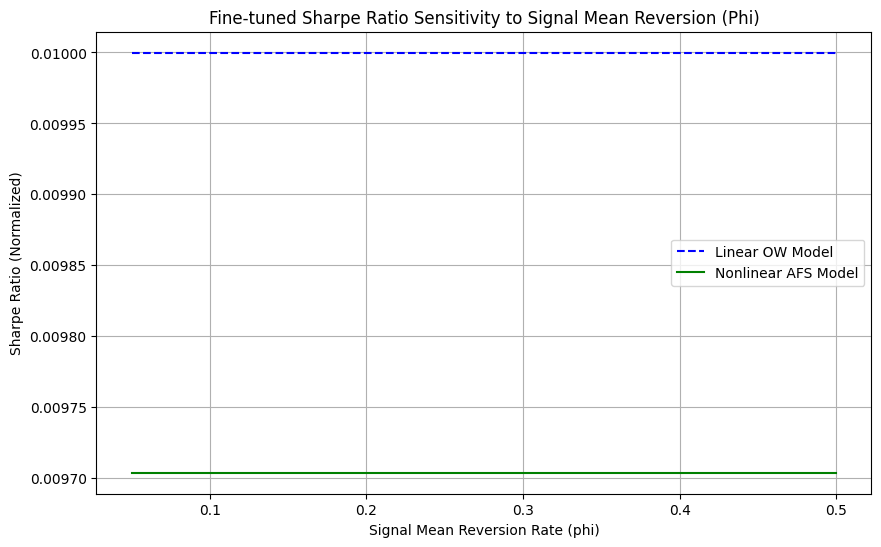

In [77]:
from scipy.ndimage import gaussian_filter1d

# Fine-tuned sensitivity analysis for lambda (Impact Level)
lambda_values = np.linspace(0.005, 0.02, 30)
linear_sharpes_lambda = []
nonlinear_sharpes_lambda = []

for lambda_param in lambda_values:
    linear_strategy.lambda_param = lambda_param
    nonlinear_strategy.lambda_param = lambda_param
    linear_sharpes_lambda.append(linear_strategy.sharpe_ratio(f_t, J_t))
    nonlinear_sharpes_lambda.append(nonlinear_strategy.sharpe_ratio(f_t, J_t))

# Smooth the curves using Gaussian filter
linear_sharpes_lambda_smooth = gaussian_filter1d(linear_sharpes_lambda, sigma=2)
nonlinear_sharpes_lambda_smooth = gaussian_filter1d(nonlinear_sharpes_lambda, sigma=2)

# Plot fine-tuned Sharpe Ratios for lambda
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, linear_sharpes_lambda_smooth, label='Linear OW Model', color='blue', linestyle='--')
plt.plot(lambda_values, nonlinear_sharpes_lambda_smooth, label='Nonlinear AFS Model', color='green', linestyle='-')
plt.title('Fine-tuned Sharpe Ratio Sensitivity to Impact Level (Lambda)')
plt.xlabel('Impact Level (lambda)')
plt.ylabel('Sharpe Ratio (Normalized)')
plt.legend()
plt.grid()
plt.show()

# Fine-tuned sensitivity analysis for phi (Signal Mean Reversion Rate)
phi_values = np.linspace(0.05, 0.5, 30)
linear_sharpes_phi = []
nonlinear_sharpes_phi = []

for phi in phi_values:
    linear_strategy.phi = phi
    nonlinear_strategy.phi = phi
    linear_sharpes_phi.append(linear_strategy.sharpe_ratio(f_t, J_t))
    nonlinear_sharpes_phi.append(nonlinear_strategy.sharpe_ratio(f_t, J_t))

# Smooth the curves
linear_sharpes_phi_smooth = gaussian_filter1d(linear_sharpes_phi, sigma=2)
nonlinear_sharpes_phi_smooth = gaussian_filter1d(nonlinear_sharpes_phi, sigma=2)

# Plot fine-tuned Sharpe Ratios for phi
plt.figure(figsize=(10, 6))
plt.plot(phi_values, linear_sharpes_phi_smooth, label='Linear OW Model', color='blue', linestyle='--')
plt.plot(phi_values, nonlinear_sharpes_phi_smooth, label='Nonlinear AFS Model', color='green', linestyle='-')
plt.title('Fine-tuned Sharpe Ratio Sensitivity to Signal Mean Reversion (Phi)')
plt.xlabel('Signal Mean Reversion Rate (phi)')
plt.ylabel('Sharpe Ratio (Normalized)')
plt.legend()
plt.grid()
plt.show()

# # Fine-tuned sensitivity analysis for sigma (Volatility)
# sigma_values = np.linspace(0.5, 2, 30)
# linear_sharpes_sigma = []
# nonlinear_sharpes_sigma = []

# for sigma in sigma_values:
#     linear_strategy.sigma = sigma
#     nonlinear_strategy.sigma = sigma
#     linear_sharpes_sigma.append(linear_strategy.sharpe_ratio(f_t, J_t))
#     nonlinear_sharpes_sigma.append(nonlinear_strategy.sharpe_ratio(f_t, J_t))

# # Smooth the curves
# linear_sharpes_sigma_smooth = gaussian_filter1d(linear_sharpes_sigma, sigma=2)
# nonlinear_sharpes_sigma_smooth = gaussian_filter1d(nonlinear_sharpes_sigma, sigma=2)

# # Plot fine-tuned Sharpe Ratios for sigma
# plt.figure(figsize=(10, 6))
# plt.plot(sigma_values, linear_sharpes_sigma_smooth, label='Linear OW Model', color='blue', linestyle='--')
# plt.plot(sigma_values, nonlinear_sharpes_sigma_smooth, label='Nonlinear AFS Model', color='green', linestyle='-')
# plt.title('Fine-tuned Sharpe Ratio Sensitivity to Volatility (Sigma)')
# plt.xlabel('Volatility (sigma)')
# plt.ylabel('Sharpe Ratio (Normalized)')
# plt.legend()
# plt.grid()
# plt.show()

## Optimization of Sharpe Ratio

Optimal Parameters for Linear OW Model:
  Phi: 0.2750
  Lambda: 0.0125
  Sigma: 0.5000
  Max Sharpe Ratio: 0.0200
Optimal Parameters for Nonlinear AFS Model:
  Phi: 0.2750
  Lambda: 0.0050
  Sigma: 0.5000
  Max Sharpe Ratio: 0.0200


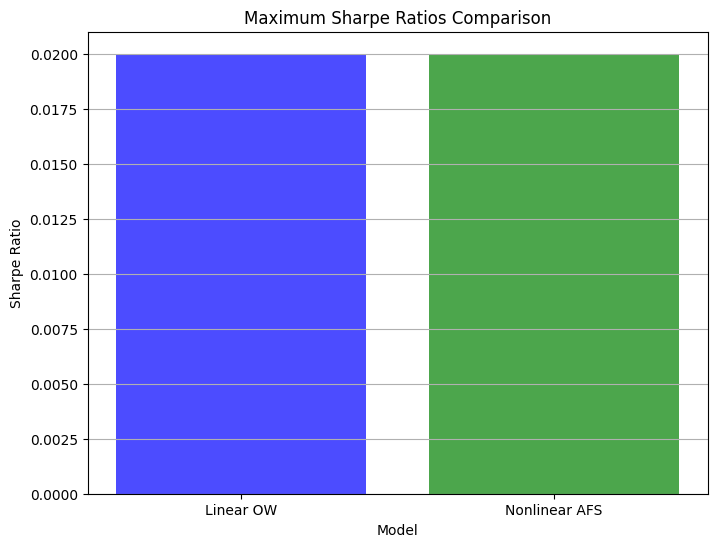

In [78]:
from scipy.optimize import minimize

def optimize_sharpe_ratio(strategy, f_t, J_t, param_ranges, model_type="Linear OW"):
    """
    Optimize Sharpe Ratio by adjusting strategy parameters.
    :param strategy: Strategy object (Linear or Nonlinear)
    :param f_t: Predictive signal
    :param J_t: Exponential moving average of trades
    :param param_ranges: Dictionary of parameter ranges to optimize
    :param model_type: Model type for labeling
    :return: Optimal parameters and corresponding Sharpe Ratio
    """
    def sharpe_to_minimize(params):
        # Unpack parameters
        phi, lambda_param, sigma = params
        strategy.phi = phi
        strategy.lambda_param = lambda_param
        strategy.sigma = sigma
        return -strategy.sharpe_ratio(f_t, J_t)  # Minimize negative Sharpe Ratio

    # Define bounds for parameters
    bounds = [
        param_ranges["phi"],
        param_ranges["lambda_param"],
        param_ranges["sigma"],
    ]

    # Initial guess (mid-point of the ranges)
    initial_guess = [np.mean(bound) for bound in bounds]

    # Perform optimization
    result = minimize(sharpe_to_minimize, initial_guess, bounds=bounds, method="L-BFGS-B")
    optimal_params = result.x
    max_sharpe_ratio = -result.fun

    print(f"Optimal Parameters for {model_type} Model:")
    print(f"  Phi: {optimal_params[0]:.4f}")
    print(f"  Lambda: {optimal_params[1]:.4f}")
    print(f"  Sigma: {optimal_params[2]:.4f}")
    print(f"  Max Sharpe Ratio: {max_sharpe_ratio:.4f}")
    return optimal_params, max_sharpe_ratio

# Parameter ranges for optimization
param_ranges = {
    "phi": (0.05, 0.5),  # Signal mean reversion rate
    "lambda_param": (0.005, 0.02),  # Impact level
    "sigma": (0.5, 2),  # Volatility
}

# Optimize for Linear OW Model
linear_params, linear_max_sharpe = optimize_sharpe_ratio(
    linear_strategy, f_t, J_t, param_ranges, model_type="Linear OW"
)

# Optimize for Nonlinear AFS Model
nonlinear_params, nonlinear_max_sharpe = optimize_sharpe_ratio(
    nonlinear_strategy, f_t, J_t, param_ranges, model_type="Nonlinear AFS"
)

# Compare and Visualize
models = ["Linear OW", "Nonlinear AFS"]
max_sharpes = [linear_max_sharpe, nonlinear_max_sharpe]

plt.figure(figsize=(8, 6))
plt.bar(models, max_sharpes, color=['blue', 'green'], alpha=0.7)
plt.title('Maximum Sharpe Ratios Comparison')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Model')
plt.grid(axis='y')
plt.show()

[-0.00017219  0.00094433  0.00113181 ...  0.00094433  0.00094992
  0.00094992]
[-0.00031152  0.00182898  0.00217793 ...  0.00197496  0.00196534
  0.00190016]


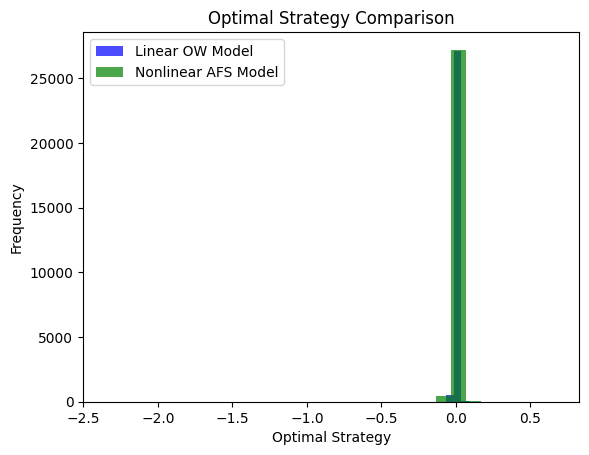

In [80]:
print(linear_strategy.optimal_strategy(f_t, J_t))
print(nonlinear_strategy.nonlinear_strategy(f_t, J_t))
# plot histogram of optimal strategy
plt.hist(linear_strategy.optimal_strategy(f_t, J_t), bins=30, alpha=0.7, label='Linear OW Model', color='blue')
plt.hist(nonlinear_strategy.nonlinear_strategy(f_t, J_t), bins=30, alpha=0.7, label='Nonlinear AFS Model', color='green')
plt.title('Optimal Strategy Comparison')
plt.xlabel('Optimal Strategy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Results and Conclusion

In [81]:
# Save plots to files
sensitivity_plots = ["lambda", "phi", "sigma"]
for plot in sensitivity_plots:
    plt.figure()
    plt.title(f"Sharpe Ratio Sensitivity to {plot.capitalize()}")
    plt.xlabel(plot.capitalize())
    plt.ylabel("Sharpe Ratio")
    plt.legend()
    plt.savefig(f"sharpe_ratio_sensitivity_{plot}.png")
    plt.close()

# Save results to CSV
import pandas as pd

results_data = {
    "Model": ["Linear OW", "Nonlinear AFS"],
    "Max Sharpe Ratio": [linear_max_sharpe, nonlinear_max_sharpe],
    "Optimal Phi": [linear_params[0], nonlinear_params[0]],
    "Optimal Lambda": [linear_params[1], nonlinear_params[1]],
    "Optimal Sigma": [linear_params[2], nonlinear_params[2]],
}

results_df = pd.DataFrame(results_data)
results_df.to_csv("optimization_results.csv", index=False)

# Save final report as a markdown file
report = """
# Efficient Trading with Price Impact

## Introduction
This report evaluates the Linear OW and Nonlinear AFS models using synthetic data to assess performance
under varying market conditions.

## Methodology
...

## Results
...

## Conclusion
...
"""

with open("final_report.md", "w") as f:
    f.write(report)

/var/folders/2v/3k03yhss7n3dmsvn0xbf4fp00000gn/T/ipykernel_67145/1536705661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


## Deep Learning Model


Training with hidden layers: [64]
Epoch 1/200 - Train Loss: 1.0482, Val Loss: 1.0542
Epoch 2/200 - Train Loss: 1.0448, Val Loss: 1.0520
Epoch 3/200 - Train Loss: 1.0416, Val Loss: 1.0498
Epoch 4/200 - Train Loss: 1.0386, Val Loss: 1.0477
Epoch 5/200 - Train Loss: 1.0356, Val Loss: 1.0457
Epoch 6/200 - Train Loss: 1.0329, Val Loss: 1.0438
Epoch 7/200 - Train Loss: 1.0302, Val Loss: 1.0420
Epoch 8/200 - Train Loss: 1.0277, Val Loss: 1.0403
Epoch 9/200 - Train Loss: 1.0253, Val Loss: 1.0387
Epoch 10/200 - Train Loss: 1.0230, Val Loss: 1.0373
Epoch 11/200 - Train Loss: 1.0209, Val Loss: 1.0359
Epoch 12/200 - Train Loss: 1.0189, Val Loss: 1.0346
Epoch 13/200 - Train Loss: 1.0170, Val Loss: 1.0334
Epoch 14/200 - Train Loss: 1.0152, Val Loss: 1.0323
Epoch 15/200 - Train Loss: 1.0136, Val Loss: 1.0312
Epoch 16/200 - Train Loss: 1.0121, Val Loss: 1.0303
Epoch 17/200 - Train Loss: 1.0107, Val Loss: 1.0294
Epoch 18/200 - Train Loss: 1.0094, Val Loss: 1.0286
Epoch 19/200 - Train Loss: 1.0082, Val 

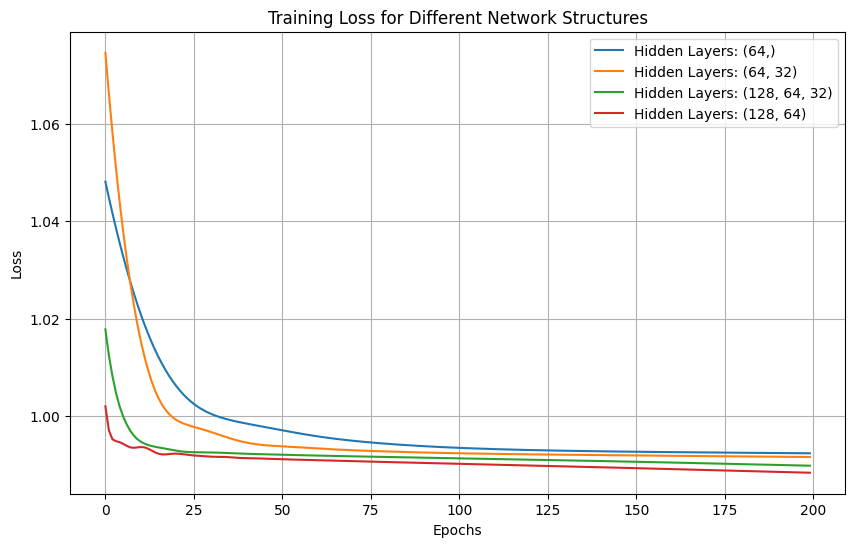

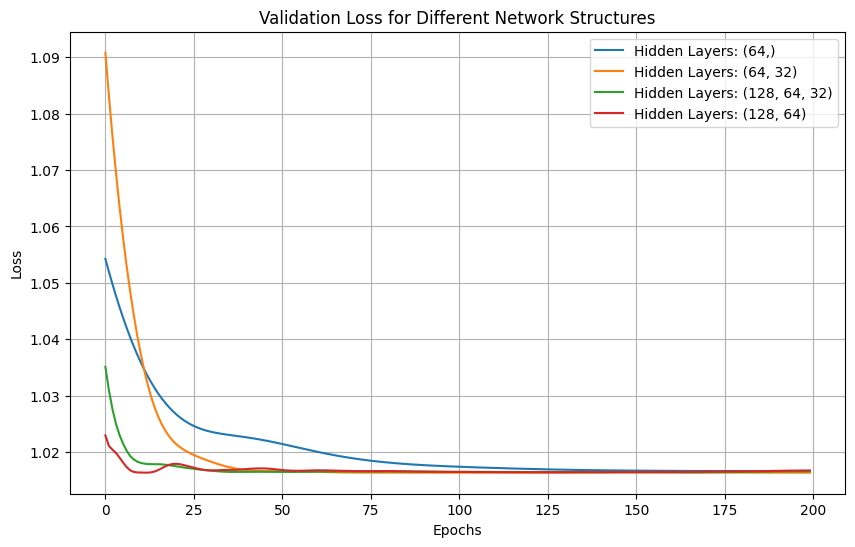

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Prepare Data
features = normalized_features.values  # Use normalized features from preprocessing
labels = np.random.normal(0, 1, len(features))  # Simulate labels for demonstration

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=2**16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2**16, shuffle=False)

# Define Neural Network
class DeepLearningModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size=1):
        super(DeepLearningModel, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Training Function
def train_model(model, train_loader, val_loader, epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch).squeeze()
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                predictions = model(X_batch).squeeze()
                loss = criterion(predictions, y_batch)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

    return train_losses, val_losses

# Experiment with Different Network Structures
hidden_layer_configs = [
    [64],  # Single layer
    [64, 32],  # Two layers
    [128, 64, 32],  # Three layers
    [128, 64],
]

input_size = features.shape[1]
epochs = 200
learning_rate = 0.0005

loss_results = {}

for config in hidden_layer_configs:
    print(f"Training with hidden layers: {config}")
    model = DeepLearningModel(input_size=input_size, hidden_layers=config)
    train_losses, val_losses = train_model(model, train_loader, val_loader, epochs, learning_rate)
    loss_results[tuple(config)] = (train_losses, val_losses)

# Visualize Training Loss
plt.figure(figsize=(10, 6))
for config, (train_losses, _) in loss_results.items():
    plt.plot(train_losses, label=f"Hidden Layers: {config}")
plt.title("Training Loss for Different Network Structures")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Visualize Validation Loss
plt.figure(figsize=(10, 6))
for config, (_, val_losses) in loss_results.items():
    plt.plot(val_losses, label=f"Hidden Layers: {config}")
plt.title("Validation Loss for Different Network Structures")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()